In [144]:
#import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn as sk
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Data Preparation 

In [145]:
#import data file & preview data 
df = pd.read_csv('/Users/Amanda.Hartzler/Desktop/Data_Analytics_Masters/D208/churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [146]:
#determine column names, non-null values, & data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [147]:
#There are no missing/null values. 

#determine if any rows are duplicated 
print(df.duplicated())
print(df.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool
0


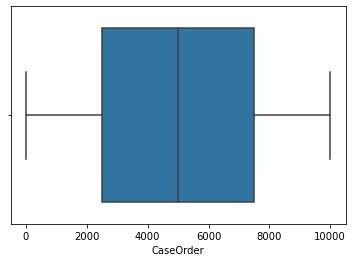

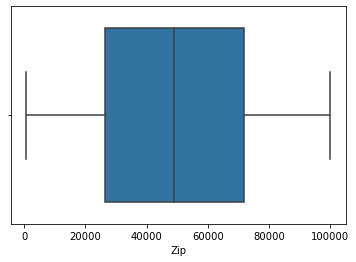

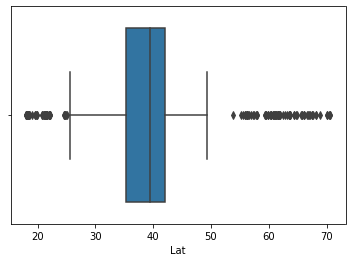

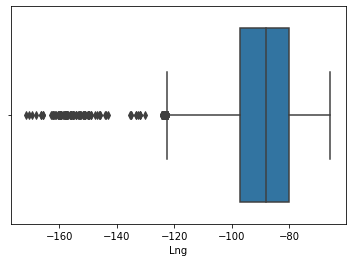

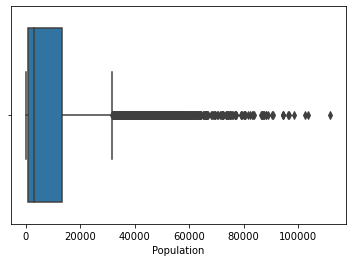

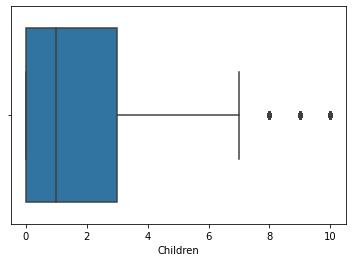

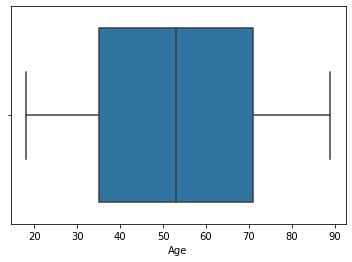

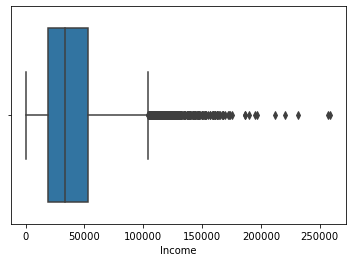

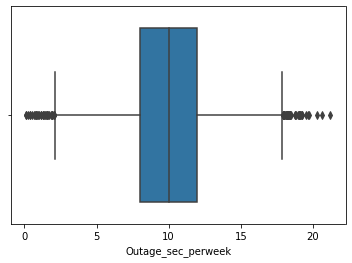

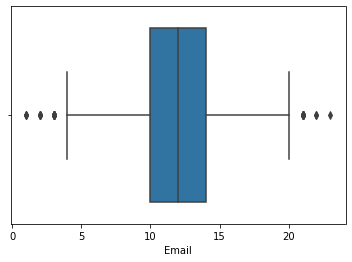

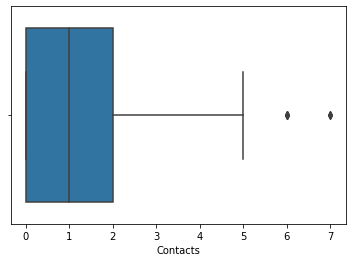

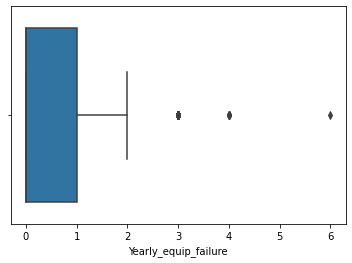

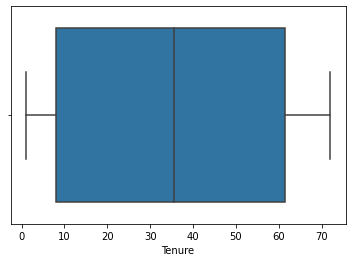

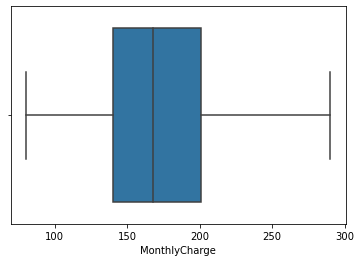

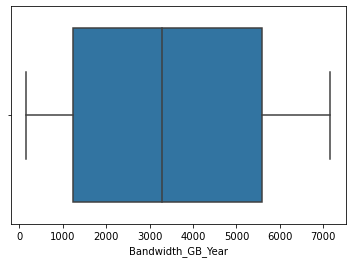

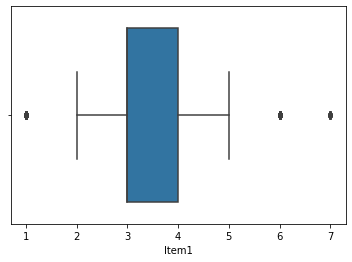

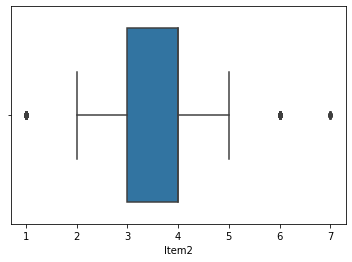

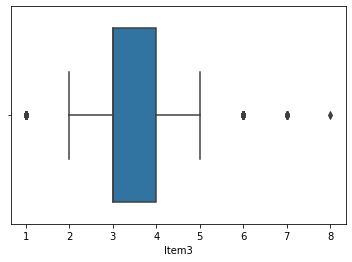

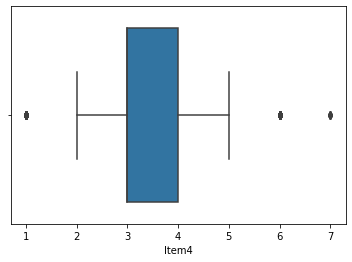

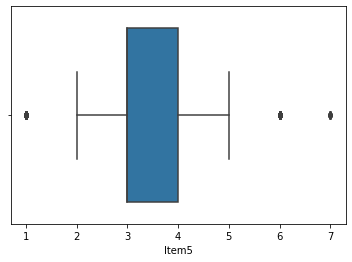

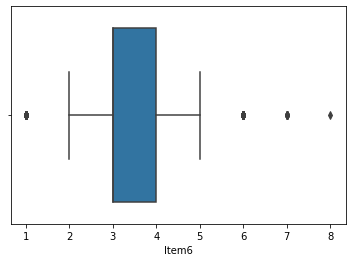

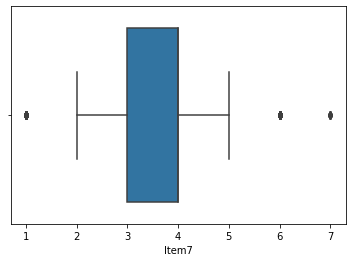

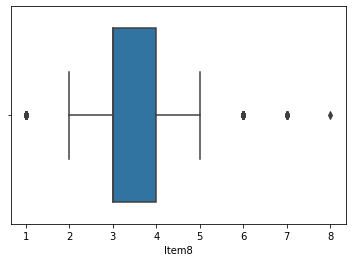

In [148]:
#There are no duplicated values

#Using Boxplots, check for outliers in each in each float or integer value column.
outliers = ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

i=0 
while i < len(outliers):
    sns.boxplot(x = outliers[i], data = df)
    plt.show()
    i = i + 1
#(Python - Loop Lists, 2022)

In [149]:
#Outliers found in Lat, Lng, Population, Children, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Item1, Item2, Item3, Item4, Item5, Item6, Item7, & Item8 columns. 

#Treating outliers: 
df['Lat'].describe()

count    10000.000000
mean        38.757567
std          5.437389
min         17.966120
25%         35.341828
50%         39.395800
75%         42.106908
max         70.640660
Name: Lat, dtype: float64

In [150]:
#Retain outliers in Lat (Incuding US territories, the min and max are within a valid range) (Bathman, 2018)
df['Lng'].describe()

count    10000.000000
mean       -90.782536
std         15.156142
min       -171.688150
25%        -97.082812
50%        -87.918800
75%        -80.088745
max        -65.667850
Name: Lng, dtype: float64

In [151]:
#Retain outliers in Lng (Incuding US territories, the min and max are within a valid range) (Bathman, 2018)
print(df['Population'].describe())

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64


In [152]:
#Replace outlier population values > 27,000 
#New York City, NY, has the most density population in the US. In New York the max population density is a little over 27,000 per square mile. Therefore the right skewed outliers are likely entry errors. (Planning-Population-NYC Population Facts, n.d.)
df['Population'] = np.where(df['Population'] >= 27000, 2931, df['Population'])
print(df['Population'].describe())

count    10000.000000
mean      4949.264200
std       6338.293875
min          0.000000
25%        738.000000
50%       2910.500000
75%       5943.000000
max      26999.000000
Name: Population, dtype: float64


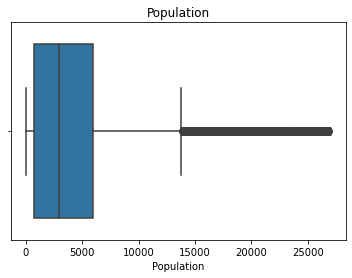

In [153]:
#Check distribution of population data. 
Population_boxplot = sns.boxplot(x = "Population", data = df).set_title("Population")
plt.show()

In [154]:
#Retain outliers in Children (All values are possible children values)
#Check that the max income is within a reasonable range
print(df['Income'].describe())

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64


In [155]:
#Retain outliers in income (All values are possible income values)
#Check that the max and min outage_sec_perweek is within a reasonable range
print(df['Outage_sec_perweek'].describe())

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64


In [156]:
#Retain outliers in outage_sec_perweek (All values are possible outage values)
#Retain outliers in Email (All values are possible email values)
#Retain outliers in Contacts (All values are possible contact values)
#Retain outliers in Yearly_equip_failure (All values are possible equipment failure values)
#Check that the MonthlyCharge income is within a reasonable range
print(df['MonthlyCharge'].describe())

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64


In [157]:
#Retain outliers in MonthlyCharge (All values are possible monthly charge values)
#Retain outliers in all item answers (All values are possible values for each item answer)

In [158]:
#Drop Columns not used as Target or Explanatory Variables 
df.drop(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Children', 'Age', 'Marital', 'Gender', 'Techie', 'Port_modem', 'Tablet', 'InternetService', 'OnlineSecurity', 'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis = 1, inplace = True)

In [159]:
#Descriptive Statistics for all relevant variables
relevant_variables = [df['Population'], df['Area'], df['Income'], df['Churn'], df['Outage_sec_perweek'], df['Email'], df['Contacts'], df['Yearly_equip_failure'], df['Contract'], df['Phone'], df['Multiple'], df['OnlineBackup'], df['DeviceProtection'], df['TechSupport'], df['StreamingTV'], df['StreamingMovies'], df['Tenure'], df['MonthlyCharge'], df['Bandwidth_GB_Year']]
rv = ['Population', 'Area', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Contract', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

i=0 
while i < len(relevant_variables):
    print(' ')
    print(str(rv[i]) + ' Descriptive Statistics')
    print(relevant_variables[i]. describe())
    i = i + 1
    #(Python - Loop Lists, 2022)

 
Population Descriptive Statistics
count    10000.000000
mean      4949.264200
std       6338.293875
min          0.000000
25%        738.000000
50%       2910.500000
75%       5943.000000
max      26999.000000
Name: Population, dtype: float64
 
Area Descriptive Statistics
count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object
 
Income Descriptive Statistics
count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64
 
Churn Descriptive Statistics
count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object
 
Outage_sec_perweek Descriptive Statistics
count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: flo

In [160]:
#Re-expressing Categorical Variables
#label encoding yes/no dichotomous binary columns. Yes = 1, No = 0
labelencoder = LabelEncoder()
df['Churn'] = labelencoder.fit_transform(df['Churn'])
df['Phone'] = labelencoder.fit_transform(df['Phone'])
df['Multiple'] = labelencoder.fit_transform(df['Multiple'])
df['OnlineBackup'] = labelencoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = labelencoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = labelencoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = labelencoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = labelencoder.fit_transform(df['StreamingMovies'])
#(Great Learning Team, 2022)

In [161]:
#Ordinal Encoding
df['Contract_numeric'] = df['Contract'] 
dict_edu = {'Contract_numeric': {'Month-to-month': 0, 'One year': 1, 'Two Year': 2}}
df.replace(dict_edu, inplace = True)
#(Middleton, 2022)

In [162]:
#One-Hot Encoding 
dummy_area = pd.get_dummies(df['Area'], prefix='Area', drop_first=True)

df = pd.merge(
    left=df,
    right=dummy_area,
    left_index=True,
    right_index=True,
)
#(Pandas Get Dummies (One-Hot Encoding) Explained, 2021)

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Area_Suburban'}>,
        <AxesSubplot:title={'center':'Area_Urban'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'Outage_sec_perweek'}>,
        <AxesSubplot:title={'center':'Email'}>,
        <AxesSubplot:title={'center':'Contacts'}>],
       [<AxesSubplot:title={'center':'Yearly_equip_failure'}>,
        <AxesSubplot:title={'center':'Phone'}>,
        <AxesSubplot:title={'center':'Multiple'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>],
       [<AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>,
        <AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>],
       [<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>,
        <AxesSubplot:title={'c

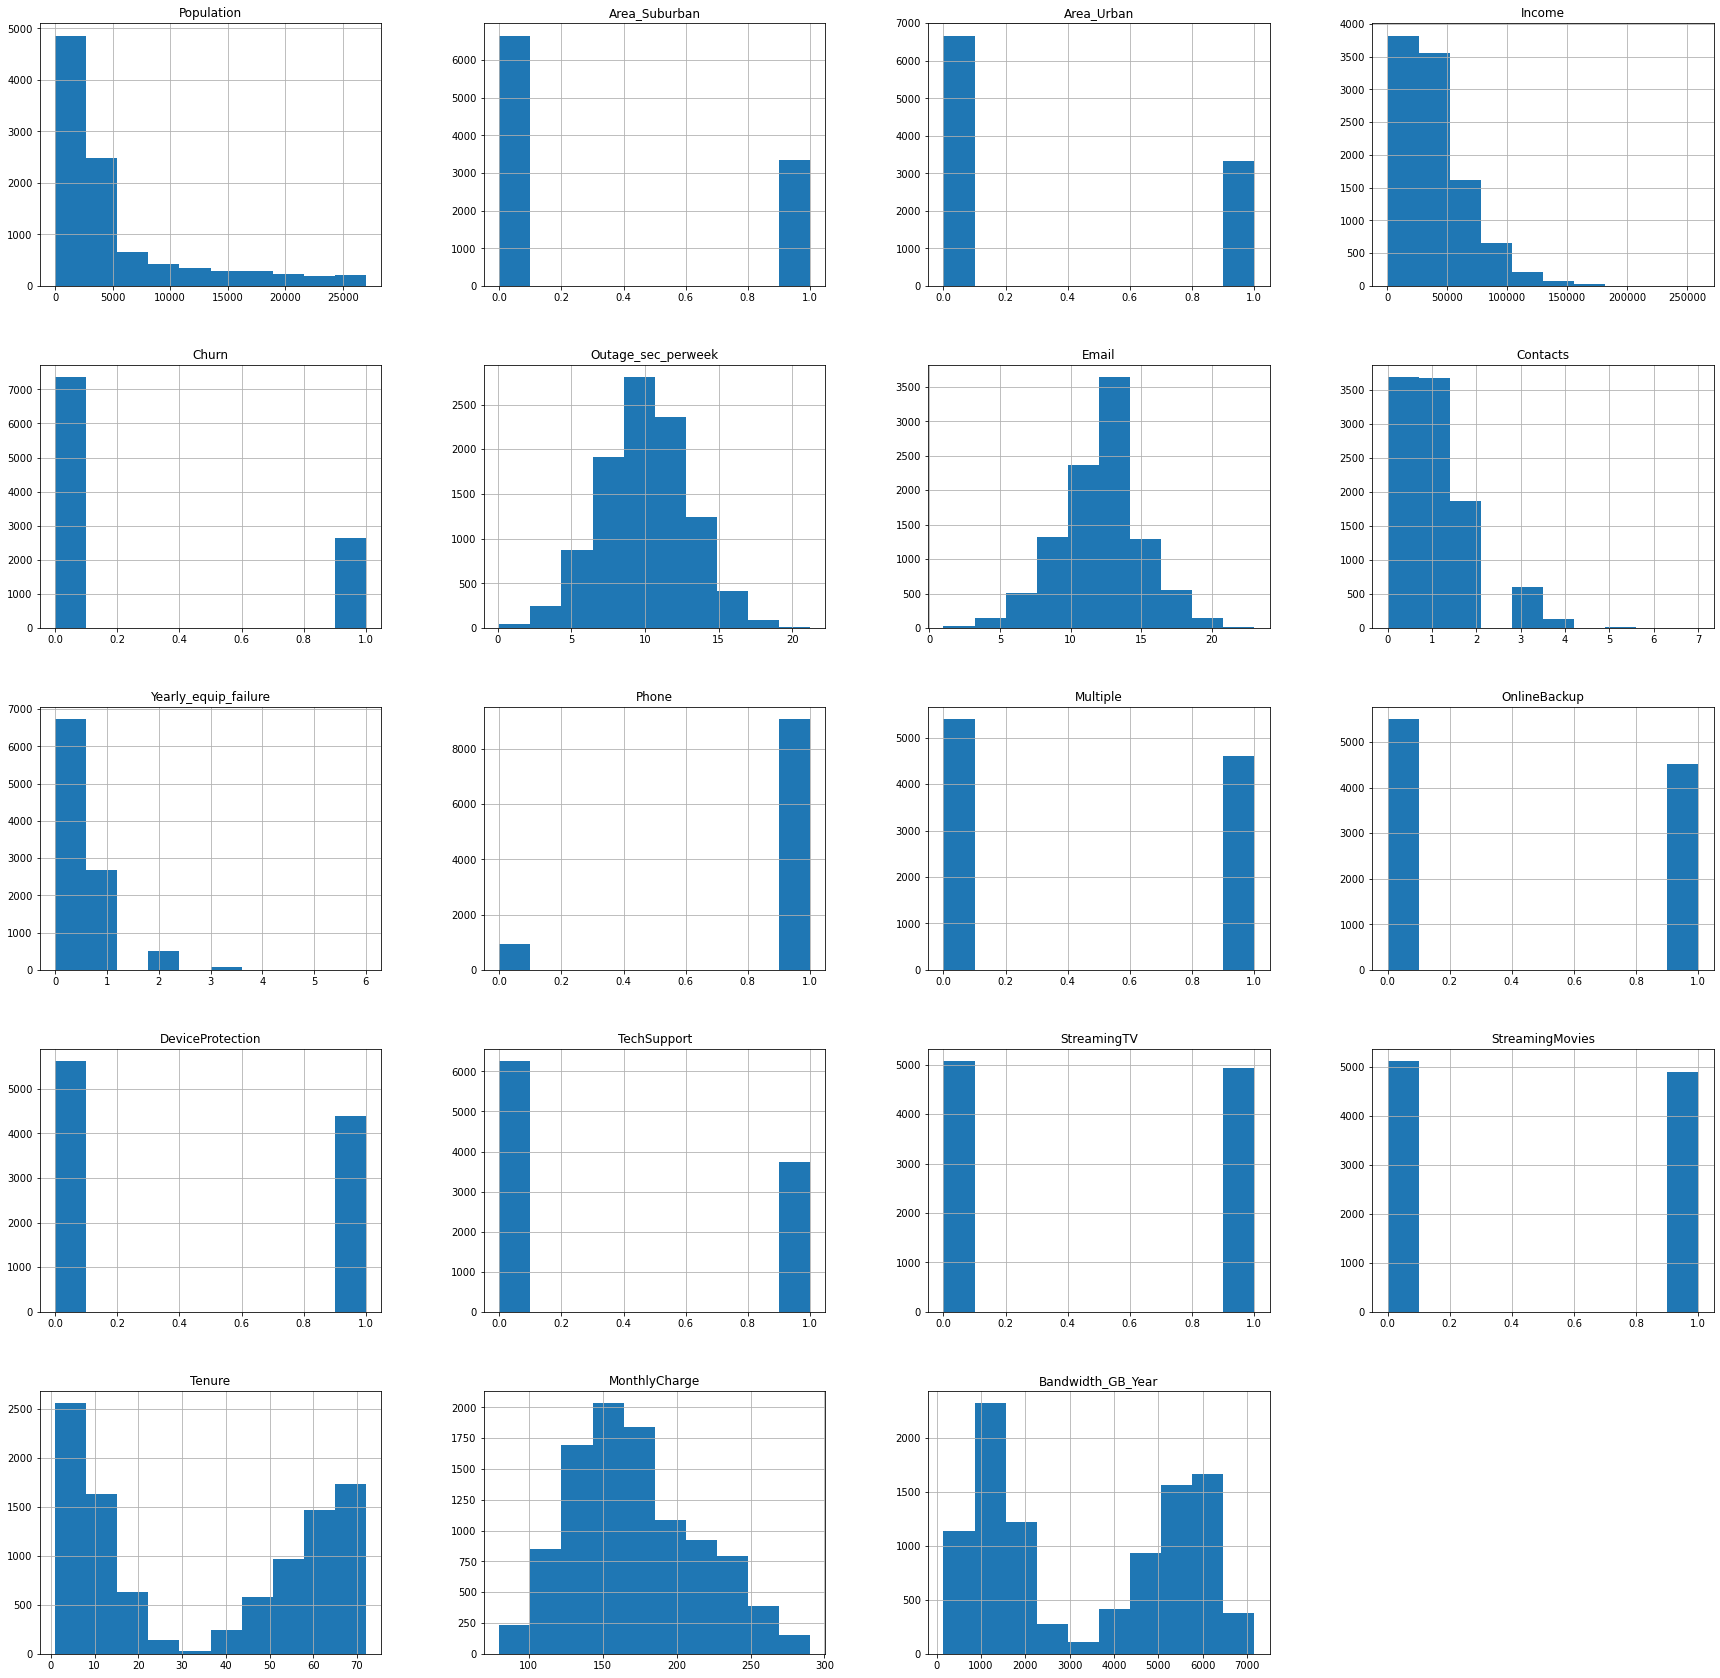

In [163]:
#Visually explore target & explanatory variables with univariate analysis by creating histograms 
df.hist(column=['Population', 'Area_Suburban', 'Area_Urban', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Contract', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'], figsize=(30,30))


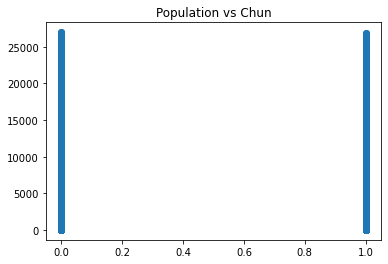

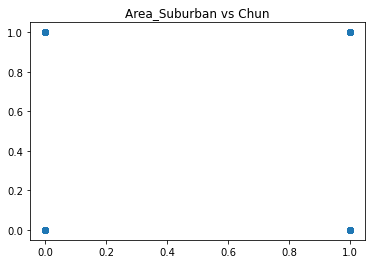

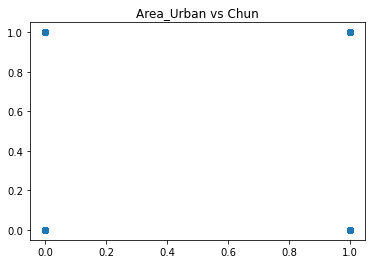

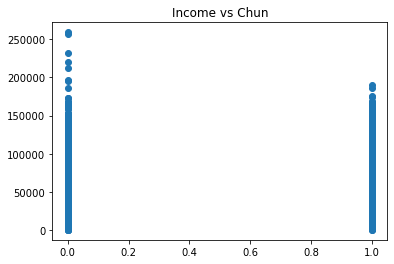

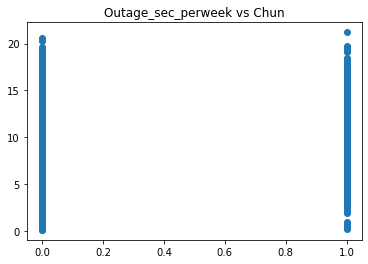

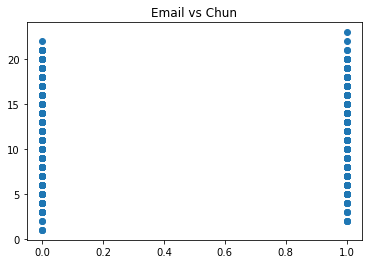

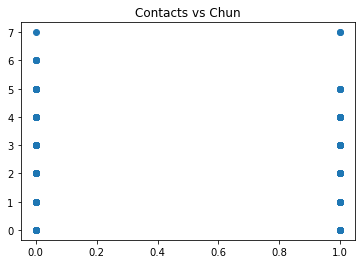

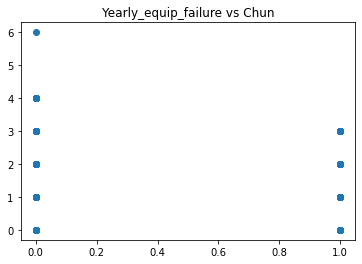

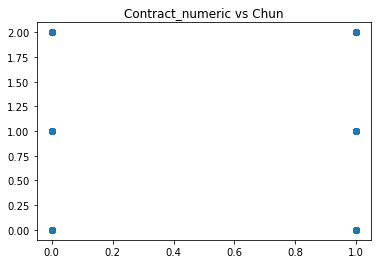

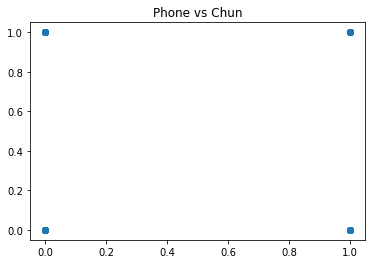

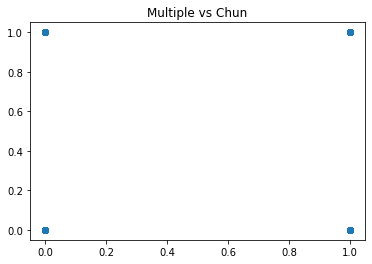

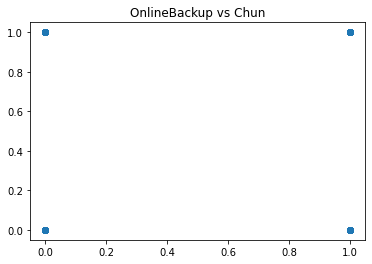

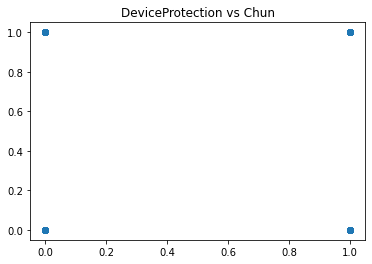

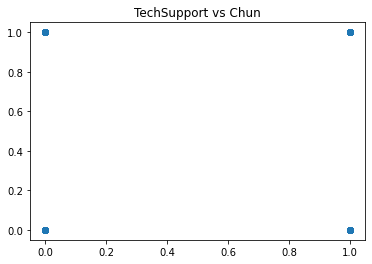

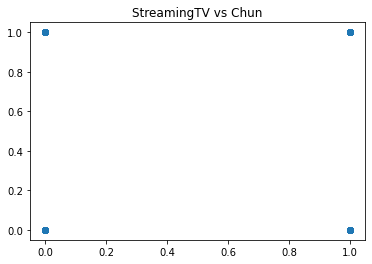

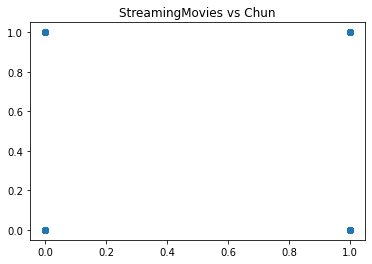

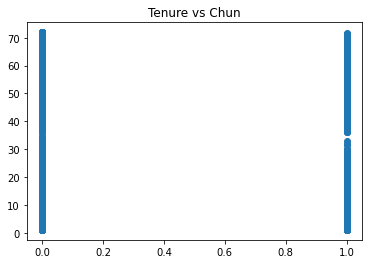

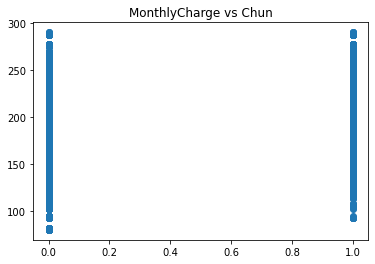

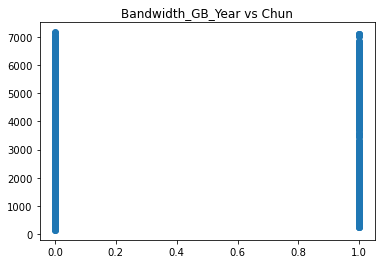

In [180]:
#Visually explore relationship between target and explanatory variables with bivariate analysis by creating scatterplots
nv = ['Population', 'Area_Suburban', 'Area_Urban', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Contract_numeric', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

i=0 
while i < len(nv):
    plt.scatter(df['Churn'], df[nv[i]])
    plt.title(str(nv[i]) + ' vs Chun')
    plt.show()
    i = i + 1
#(Python - Loop Lists, 2022)

In [165]:
df.to_csv('/Users/Amanda.Hartzler/Desktop/D208_PA_Task2.csv')

# Logistic Regression 

In [166]:
#Create original logistic regression model with all explanatory variables included.
original_regression = logit('Churn ~ Population + Area_Suburban + Area_Urban + Income + Outage_sec_perweek + Email + Contacts + Yearly_equip_failure + Contract_numeric + Phone + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + Tenure + MonthlyCharge + Bandwidth_GB_Year', data=df).fit()

#Display model summary
original_regression.summary() #(van den Broeck, 2022)

Optimization terminated successfully.
         Current function value: 0.242277
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.5810
Time:                        18:06:16   Log-Likelihood:                -2422.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.3134      0.345     -9.616      0.000      -3.989      -2.638
Population            1.601e-06    5.7e-06      0.281      0.779   -9.56e-06    1.28e-05
Area_Suburban           -0.0745      0.090     -0.828      0.408      -0.251       0.102
Area_Urban               0.0350      0.089      0.393      0.694      -0.140       0.210
Income                4.147e-07    1.3e-06      0.320      0.749   -2.13e-06    2.96e-06
Outage_sec_perweek      -0.0011      0.012     -0.090      0.928      -0.025       0.023
Email                   -0.0046      0.012     -0.385      0.700      -0.028       0.019
Contacts                 0.0547      0.037      1.490      0.136      -0.017       0.127
Yearly_equip_failure    -0.0383      0.058     -0.666      0.505      -0.151       0.074
Contract_numeric        -1.8345      0.060    -30.445      0.000      -1.953      -1.716
Phone                   -0.2873      0.124     -2.314      0.021      -0.531      -0.044
Multiple                 1.0401      0.113      9.223      0.000       0.819       1.261
OnlineBackup             0.3019      0.095      3.195      0.001       0.117       0.487
DeviceProtection         0.0540      0.081      0.664      0.507      -0.105       0.213
TechSupport              0.1771      0.081      2.189      0.029       0.019       0.336
StreamingTV              1.7115      0.143     11.995      0.000       1.432       1.991
StreamingMovies          2.1568      0.162     13.284      0.000       1.839       2.475
Tenure                  -0.3128      0.015    -21.075      0.000      -0.342      -0.284
MonthlyCharge            0.0085      0.002      3.507      0.000       0.004       0.013
Bandwidth_GB_Year        0.0026      0.000     15.221      0.000       0.002       0.003
========================================================================================
"""

In [167]:
#Check for multicollinearity using VIF (Sewell, 2022). 
x = df[['Population', 'Area_Suburban', 'Area_Urban', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Contract_numeric', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns

vif_data['VIF'] = [variance_inflation_factor(x.values, i)
for i in range(len(x.columns))]
#(Sewell, 2022)
vif_data

,Feature,VIF
0,Population,1.600730
1,Area_Suburban,1.970623
2,Area_Urban,1.963872
3,Income,2.923858
4,Outage_sec_perweek,10.775241
5,Email,13.740311
6,Contacts,1.996393
7,Yearly_equip_failure,1.383971
8,Contract_numeric,1.693392
9,Phone,9.392341


In [168]:
#Drop Bandwidth_GB_Year, Tenure, MonthlyCharge, Email, & Outage_sec_perweek due to VIF greater than 10 therefore they are highly correlated with another feature. 

#Re-fit logistic regression model without Bandwidth_GB_Year, Tenure, MonthlyCharge, Email, & Outage_sec_perweek
regression_2 = logit('Churn ~ Population + Area_Suburban + Area_Urban + Income + Contacts + Yearly_equip_failure + Contract_numeric + Phone + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies', data=df).fit()

#Display model summary
regression_2.summary() #(van den Broeck, 2022)

Optimization terminated successfully.
         Current function value: 0.447304
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.2264
Time:                        18:06:16   Log-Likelihood:                -4473.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.8872      0.131    -22.092      0.000      -3.143      -2.631
Population            6.199e-07   4.15e-06      0.149      0.881   -7.51e-06    8.75e-06
Area_Suburban           -0.0195      0.065     -0.302      0.763      -0.146       0.107
Area_Urban               0.0928      0.064      1.447      0.148      -0.033       0.218
Income                6.351e-07   9.25e-07      0.686      0.493   -1.18e-06    2.45e-06
Contacts                 0.0289      0.026      1.094      0.274      -0.023       0.081
Yearly_equip_failure    -0.0654      0.042     -1.565      0.118      -0.147       0.017
Contract_numeric        -1.0096      0.038    -26.610      0.000      -1.084      -0.935
Phone                   -0.1488      0.088     -1.688      0.091      -0.322       0.024
Multiple                 0.8189      0.053     15.381      0.000       0.715       0.923
OnlineBackup             0.3109      0.053      5.905      0.000       0.208       0.414
DeviceProtection         0.3061      0.053      5.811      0.000       0.203       0.409
TechSupport              0.1677      0.054      3.108      0.002       0.062       0.273
StreamingTV              1.4194      0.056     25.552      0.000       1.311       1.528
StreamingMovies          1.6862      0.056     29.915      0.000       1.576       1.797
========================================================================================
"""

In [169]:
#Re-Check for multicollinearity using VIF (Sewell, 2022).
x = df[['Population', 'Area_Suburban', 'Area_Urban', 'Income', 'Contacts', 'Yearly_equip_failure', 'Contract_numeric', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]

vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns

vif_data['VIF'] = [variance_inflation_factor(x.values, i)
for i in range(len(x.columns))]
#(Sewell, 2022)
vif_data

,Feature,VIF
0,Population,1.573931
1,Area_Suburban,1.871485
2,Area_Urban,1.864328
3,Income,2.735440
4,Contacts,1.926526
5,Yearly_equip_failure,1.364622
6,Contract_numeric,1.652730
7,Phone,5.978683
8,Multiple,1.788378
9,OnlineBackup,1.753442


In [170]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Population)
regression_3 = logit('Churn ~ Area_Suburban + Area_Urban + Income + Contacts + Yearly_equip_failure + Contract_numeric + Phone + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies', data=df).fit()

# display model summary
regression_3.summary()

Optimization terminated successfully.
         Current function value: 0.447305
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.2264
Time:                        18:06:16   Log-Likelihood:                -4473.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.8843      0.129    -22.315      0.000      -3.138      -2.631
Area_Suburban           -0.0193      0.065     -0.299      0.765      -0.146       0.107
Area_Urban               0.0928      0.064      1.448      0.148      -0.033       0.219
Income                6.347e-07   9.26e-07      0.686      0.493   -1.18e-06    2.45e-06
Contacts                 0.0289      0.026      1.096      0.273      -0.023       0.081
Yearly_equip_failure    -0.0655      0.042     -1.566      0.117      -0.147       0.016
Contract_numeric        -1.0096      0.038    -26.610      0.000      -1.084      -0.935
Phone                   -0.1487      0.088     -1.687      0.092      -0.321       0.024
Multiple                 0.8189      0.053     15.380      0.000       0.715       0.923
OnlineBackup             0.3109      0.053      5.905      0.000       0.208       0.414
DeviceProtection         0.3061      0.053      5.810      0.000       0.203       0.409
TechSupport              0.1676      0.054      3.106      0.002       0.062       0.273
StreamingTV              1.4193      0.056     25.552      0.000       1.310       1.528
StreamingMovies          1.6864      0.056     29.930      0.000       1.576       1.797
========================================================================================
"""

In [171]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Area_Suburban)
regression_4 = logit('Churn ~ Area_Urban + Income + Contacts + Yearly_equip_failure + Contract_numeric + Phone + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies', data=df).fit()

# display model summary
regression_4.summary()

Optimization terminated successfully.
         Current function value: 0.447310
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.2264
Time:                        18:06:16   Log-Likelihood:                -4473.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.8939      0.125    -23.101      0.000      -3.139      -2.648
Area_Urban               0.1025      0.055      1.851      0.064      -0.006       0.211
Income                6.325e-07   9.26e-07      0.683      0.494   -1.18e-06    2.45e-06
Contacts                 0.0289      0.026      1.095      0.273      -0.023       0.081
Yearly_equip_failure    -0.0655      0.042     -1.566      0.117      -0.147       0.016
Contract_numeric        -1.0095      0.038    -26.609      0.000      -1.084      -0.935
Phone                   -0.1486      0.088     -1.686      0.092      -0.321       0.024
Multiple                 0.8187      0.053     15.378      0.000       0.714       0.923
OnlineBackup             0.3110      0.053      5.908      0.000       0.208       0.414
DeviceProtection         0.3060      0.053      5.809      0.000       0.203       0.409
TechSupport              0.1677      0.054      3.110      0.002       0.062       0.273
StreamingTV              1.4193      0.056     25.552      0.000       1.310       1.528
StreamingMovies          1.6862      0.056     29.929      0.000       1.576       1.797
========================================================================================
"""

In [172]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Income)
regression_5 = logit('Churn ~ Area_Urban + Contacts + Yearly_equip_failure + Contract_numeric + Phone + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies', data=df).fit()

# display model summary
regression_5.summary()

Optimization terminated successfully.
         Current function value: 0.447333
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.2264
Time:                        18:06:17   Log-Likelihood:                -4473.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.8683      0.119    -24.011      0.000      -3.102      -2.634
Area_Urban               0.1023      0.055      1.847      0.065      -0.006       0.211
Contacts                 0.0288      0.026      1.093      0.274      -0.023       0.081
Yearly_equip_failure    -0.0653      0.042     -1.561      0.119      -0.147       0.017
Contract_numeric        -1.0095      0.038    -26.611      0.000      -1.084      -0.935
Phone                   -0.1488      0.088     -1.688      0.091      -0.322       0.024
Multiple                 0.8184      0.053     15.373      0.000       0.714       0.923
OnlineBackup             0.3107      0.053      5.903      0.000       0.208       0.414
DeviceProtection         0.3062      0.053      5.812      0.000       0.203       0.409
TechSupport              0.1681      0.054      3.117      0.002       0.062       0.274
StreamingTV              1.4192      0.056     25.550      0.000       1.310       1.528
StreamingMovies          1.6861      0.056     29.929      0.000       1.576       1.797
========================================================================================
"""

In [173]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Contacts)
regression_6 = logit('Churn ~ Area_Urban + Yearly_equip_failure + Contract_numeric + Phone + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies', data=df).fit()

# display model summary
regression_6.summary()

Optimization terminated successfully.
         Current function value: 0.447393
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.2263
Time:                        18:06:17   Log-Likelihood:                -4473.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.8398      0.117    -24.374      0.000      -3.068      -2.611
Area_Urban               0.1027      0.055      1.855      0.064      -0.006       0.211
Yearly_equip_failure    -0.0656      0.042     -1.568      0.117      -0.148       0.016
Contract_numeric        -1.0091      0.038    -26.604      0.000      -1.083      -0.935
Phone                   -0.1480      0.088     -1.679      0.093      -0.321       0.025
Multiple                 0.8175      0.053     15.360      0.000       0.713       0.922
OnlineBackup             0.3108      0.053      5.906      0.000       0.208       0.414
DeviceProtection         0.3063      0.053      5.816      0.000       0.203       0.410
TechSupport              0.1675      0.054      3.106      0.002       0.062       0.273
StreamingTV              1.4189      0.056     25.549      0.000       1.310       1.528
StreamingMovies          1.6864      0.056     29.935      0.000       1.576       1.797
========================================================================================
"""

In [174]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Yearly_equip_failure)
regression_7 = logit('Churn ~ Area_Urban + Contract_numeric + Phone + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies', data=df).fit()

# display model summary
regression_7.summary()

Optimization terminated successfully.
         Current function value: 0.447516
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.2260
Time:                        18:06:17   Log-Likelihood:                -4475.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.8680      0.115    -24.895      0.000      -3.094      -2.642
Area_Urban           0.1033      0.055      1.865      0.062      -0.005       0.212
Contract_numeric    -1.0088      0.038    -26.602      0.000      -1.083      -0.934
Phone               -0.1465      0.088     -1.662      0.097      -0.319       0.026
Multiple             0.8174      0.053     15.361      0.000       0.713       0.922
OnlineBackup         0.3121      0.053      5.931      0.000       0.209       0.415
DeviceProtection     0.3070      0.053      5.828      0.000       0.204       0.410
TechSupport          0.1674      0.054      3.105      0.002       0.062       0.273
StreamingTV          1.4183      0.056     25.543      0.000       1.309       1.527
StreamingMovies      1.6867      0.056     29.944      0.000       1.576       1.797
====================================================================================
"""

In [175]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Phone)
regression_8 = logit('Churn ~ Area_Urban + Contract_numeric + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies', data=df).fit()

# display model summary
regression_8.summary()

Optimization terminated successfully.
         Current function value: 0.447653
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.2258
Time:                        18:06:17   Log-Likelihood:                -4476.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.0019      0.083    -36.214      0.000      -3.164      -2.839
Area_Urban           0.1044      0.055      1.885      0.059      -0.004       0.213
Contract_numeric    -1.0097      0.038    -26.628      0.000      -1.084      -0.935
Multiple             0.8173      0.053     15.361      0.000       0.713       0.922
OnlineBackup         0.3120      0.053      5.931      0.000       0.209       0.415
DeviceProtection     0.3092      0.053      5.875      0.000       0.206       0.412
TechSupport          0.1668      0.054      3.094      0.002       0.061       0.272
StreamingTV          1.4196      0.056     25.573      0.000       1.311       1.528
StreamingMovies      1.6870      0.056     29.953      0.000       1.577       1.797
====================================================================================
"""

In [176]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Area_Urban)
regression_9 = logit('Churn ~ Contract_numeric + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies', data=df).fit()

# display model summary
regression_9.summary()

Optimization terminated successfully.
         Current function value: 0.447830
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.2255
Time:                        18:06:17   Log-Likelihood:                -4478.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.9673      0.081    -36.784      0.000      -3.125      -2.809
Contract_numeric    -1.0089      0.038    -26.620      0.000      -1.083      -0.935
Multiple             0.8176      0.053     15.370      0.000       0.713       0.922
OnlineBackup         0.3132      0.053      5.954      0.000       0.210       0.416
DeviceProtection     0.3106      0.053      5.903      0.000       0.207       0.414
TechSupport          0.1689      0.054      3.135      0.002       0.063       0.275
StreamingTV          1.4176      0.055     25.551      0.000       1.309       1.526
StreamingMovies      1.6856      0.056     29.941      0.000       1.575       1.796
====================================================================================
"""

In [177]:
# Create Confusion Matrix and Heatmap

Y = df['Churn']
X = df[['Contract_numeric', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
classifier1 = LogisticRegression()
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)
#(Aruchamy, 2021)

[[1675  150]
 [ 407  268]]


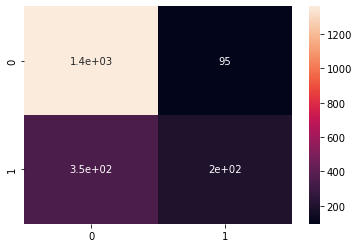

In [179]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1,annot = True)
print(cm)
#(Aruchamy, 2021)